<a href="https://colab.research.google.com/gist/Leo-Sun-BMSTU/ba861d65119095ccef045bbd28f11fe3/lw5-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5 Распознавание лиц с помощью нейросети

Для обучения нейросети понадобится графический процессор, проверим "видит" ли её среда

In [ ]:
!nvidia-smi

Tue Jan 12 10:58:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Кажется всё хорошо, графический процессор готов к работе👍

# Детектирование лиц

In [ ]:
!pip install msgpack --user

In [ ]:
!pip install tensorflow==2.4

In [ ]:
import numpy as np
np.random.seed(123) # для воспроизводимости
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8114272693492786983
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 13812936256
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17505346672017015607
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 18.0MB/s 


In [ ]:
%tensorflow_version 1.x

import mtcnn
print(mtcnn.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
0.1.0


Считывание фотографии

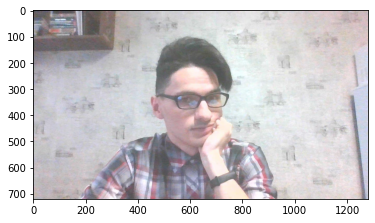

In [ ]:
from matplotlib import pyplot

img_path = "/content/drive/MyDrive/Colab Notebooks/LW5/Face.jpg"
img = pyplot.imread(img_path)
pyplot.imshow(img)
pyplot.show()

Создание экземпляра сети и запись результата разметки сети в переменную results

In [ ]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
results = detector.detect_faces(img)
results

[{'box': [490, 221, 228, 296],
  'confidence': 0.9999336004257202,
  'keypoints': {'left_eye': (588, 343),
   'mouth_left': (604, 458),
   'mouth_right': (691, 445),
   'nose': (666, 407),
   'right_eye': (692, 333)}}]

Фиксация координат рамки, в которой распологается лицо

In [ ]:
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

Обрезка фотографии

In [ ]:
face = img[y1:y2, x1:x2]

Вывод результата на экран

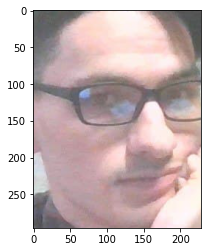

In [ ]:
from PIL import Image

image = Image.fromarray(face)
face_array = np.asarray(image)
pyplot.imshow(face_array)
pyplot.show()

Сеть работает⚙️

Создание функции-детектора лиц👨

In [ ]:
def extract_face(filename, required_size=(224, 224), resize=False):
    """Функция возвращает массив-лицо и преобразует его к заданному размеру,
    если resize == True
    
    Параметры:
    filename -- строка - путь к файлу с исходным изображением
    required_size -- кортеж из двух целых чисел - размер финального изображения
    resize -- boolean, который определяет, нужно ли менять размер изображения
    
    Возвращает np.ndarray, в котором записано обрезанное изображение с найденным
    на первоначальной картинке лицом
    """
    pixels = pyplot.imread(filename)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    if resize:
        image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

def print_image(img):
    """Выводит изображение на экран"""
    if isinstance(img, str):
        img = pyplot.imread(img)
    pyplot.imshow(img)
    pyplot.show()

Проверим сеть на прмерах фотогрфий разной сложности

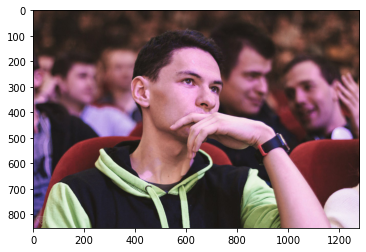

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/Face2.jpg")

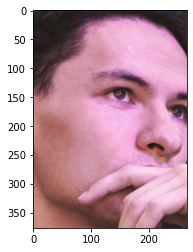

In [ ]:
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/Face2.jpg"))

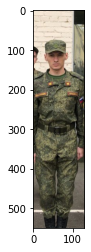

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/Standing.jpg")

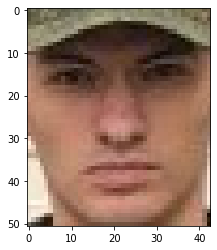

In [ ]:
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/Standing.jpg"))

Как на счёт других ракурсов?🤔

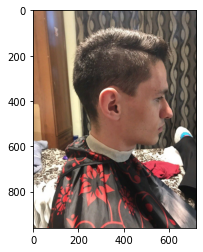

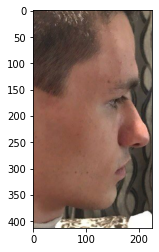

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/Reverse_Face.jpg")
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/Reverse_Face.jpg"))

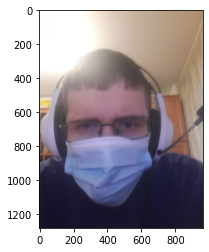

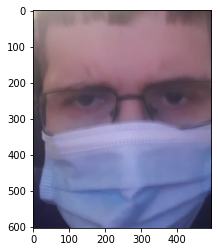

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/Test_Lev/photo_2020-12-30_08-36-54 (4).jpg")
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/Test_Lev/photo_2020-12-30_08-36-54 (4).jpg"))

Ладно, кажется это было просто

Попробуем совсем не стандарные случаи😈

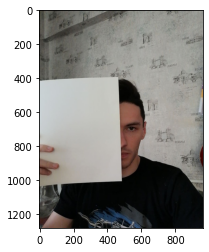

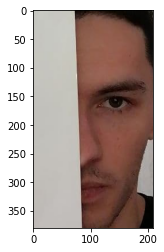

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/Half_Face.jpg")
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/Half_Face.jpg"))

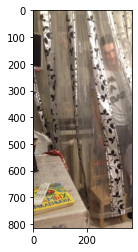

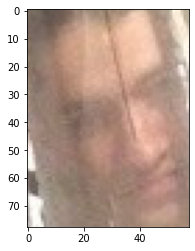

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/Hide_body.jpg")
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/Hide_body.jpg"))

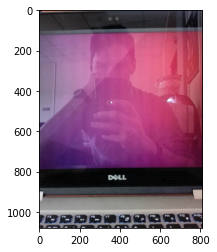

IndexError: ignored

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/Mirror.jpg")
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/Mirror.jpg"))

Ой, кажется сеть не справилась. Повторим с похожей фотографией📷

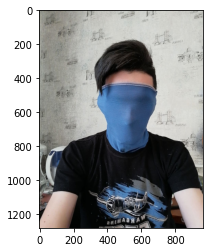

IndexError: ignored

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/NoFace.jpg")
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/NoFace.jpg"))

Дело в гразах👀

Что будет если дать сети фото, где лица нет вовсе?😃

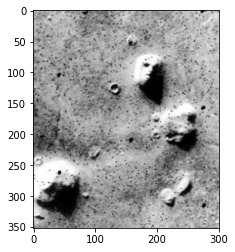

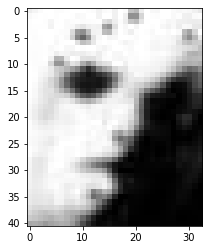

In [ ]:
print_image("/content/drive/MyDrive/Colab Notebooks/LW5/Mars.jpg")
print_image(extract_face("/content/drive/MyDrive/Colab Notebooks/LW5/Mars.jpg"))

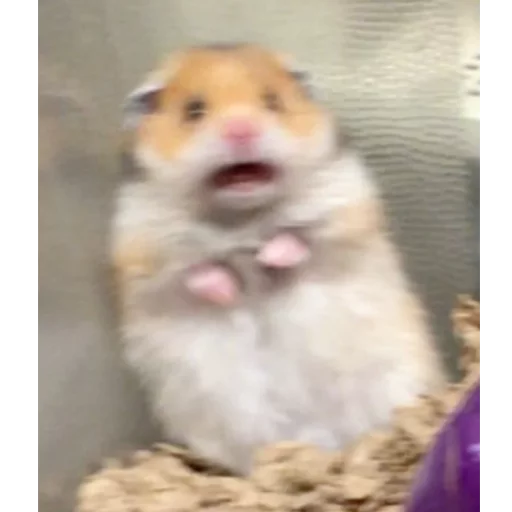

Хватит экспериментов на сегодня😰

**Вывод**: сеть не плохо справляется с фотографиями разной сложности 💪 Главное чтобы были видны глаза или области похожие на них 👀 Обмануть сеть получилось только скрыв их (не очками) 🥽
Также у сети возникли сложности с фотографией отражения, но проблема скорее всего в качестве изображения. Хотя с другой стороны, на фотографии человека скрытого за полупрозрачным материалом сеть смогла найти лицо 👨‍🦱 К стати, оказалось, сеть не может обрабатывать фото, перевёрнутые на 90 градусов и более 🔄

# Распознование лиц

Используем архитектуру VGGFace

In [ ]:
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation, Dense

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

Загрузка файла с весами для сети

In [ ]:
from keras.models import model_from_json
model.load_weights('/content/drive/MyDrive/Colab Notebooks/LW5/vgg_face_weights (1).h5')

Загрузка весов и их фиксация, для сохранения их значений во время дообучения

In [ ]:
# выходной слой с необходимым количеством нейронов
final_layer = Dense(3, activation='softmax')(model.layers[-2].output)

from keras.models import Model
model = Model(model.inputs, final_layer)
for layer in model.layers[:-1]:
    layer.trainable = False

Компиляция сети

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0   

Обучение проводится на 3 классах, каждому классу соответствует конкретный человек 👨‍🦱👨‍🦱👨‍🦱

Предобработка изображений

In [ ]:
import os

dir1_train = "/content/drive/MyDrive/Colab Notebooks/LW5/Train2"
dir1_test = "/content/drive/MyDrive/Colab Notebooks/LW5/Test1"
dir2_train = "/content/drive/MyDrive/Colab Notebooks/LW5/Train_Lev"
dir2_test = "/content/drive/MyDrive/Colab Notebooks/LW5/Test_Lev"
dir3_train = "/content/drive/MyDrive/Colab Notebooks/LW5/Traint_Serg"
dir3_test = "/content/drive/MyDrive/Colab Notebooks/LW5/Test_Serg"

files1_train = os.listdir(dir1_train)
files1_test = os.listdir(dir1_test)
files2_train = [i for i in (os.path.join(dir2_train, f) for f in os.listdir(dir2_train)) if os.path.isfile(i)] # какие то костыли, listdir не работает, хз почему
files2_test = [i for i in (os.path.join(dir2_test, f) for f in os.listdir(dir2_test)) if os.path.isfile(i)]
files3_train = os.listdir(dir3_train)
files3_test = [i for i in (os.path.join(dir3_test, f) for f in os.listdir(dir3_test)) if os.path.isfile(i)]

Детектирование

In [ ]:
images1_train = [extract_face(os.path.join(dir1_train, i), resize=True)
    for i in files1_train]

In [ ]:
images1_test = [extract_face(os.path.join(dir1_test, i), resize=True)
    for i in files1_test]

In [ ]:
images2_train = [extract_face(os.path.join(dir2_train, i), resize=True)
    for i in files2_train]

In [ ]:
images2_test = [extract_face(os.path.join(dir2_test, i), resize=True) 
    for i in files2_test]

In [ ]:
images3_train = [extract_face(os.path.join(dir3_train, i), resize=True)
    for i in files3_train]

In [ ]:
images3_test = [extract_face(os.path.join(dir3_test, i), resize=True)
    for i in files3_test]

Формирование тренировочной и тестовой выборки

In [ ]:
X_train = images1_train + images2_train + images3_train
y_train = [[1, 0, 0]] * len(images1_train) + [[0, 1, 0]] * len(images2_train) + [[0, 0, 1]] * len(images3_train)

X_test = images1_test  + images2_test + images3_test


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train = train_datagen.flow(np.asarray(X_train), np.asarray(y_train))

Обучение сети

In [ ]:
%%time
model.fit_generator(train, epochs=100, verbose=2)

In [ ]:
#model.save_weights("Lw_5_weights.h5")
model.load_weights("Lw_5_weights.h5")

In [ ]:
model.predict(np.asarray(X_test))

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.0664028e-24, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [9.9969137e-01, 3.0861626e-04, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.3971943e-14, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.000

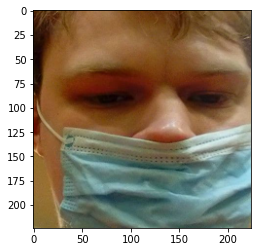

In [ ]:
pyplot.imshow(Image.fromarray(X_test[27]))
pyplot.show()

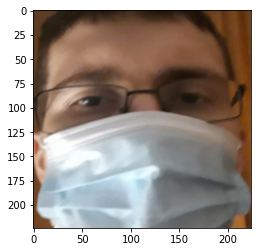

In [ ]:
pyplot.imshow(Image.fromarray(X_test[-6]))
pyplot.show()

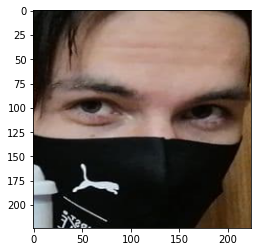

In [ ]:
pyplot.imshow(Image.fromarray(X_test[1]))
pyplot.show()

Выводы: нейросеть сделала 1 ошибку на 27-ой фотографии.